### Combining the clean award nom and gross

In [3]:
import pandas as pd
import pickle

In [4]:
# let's unpickle the two files

# award df
with open('award_noms_df.pk1', 'r') as picklefile:
    award_noms_df = pickle.load(picklefile)

# gross box office df
with open('clean_mojo_df.pk1', 'r') as picklefile:
    mojo_df = pickle.load(picklefile)

In [8]:
pd.DataFrame(mojo_df)
pd.DataFrame(award_noms_df)

,Title,main_language,nominations
0,"Crouching Tiger, Hidden Dragon",Mandarin,107
1,Life Is Beautiful,Italian,39
2,Hero,Mandarin,26
3,Instructions Not Included,Spanish,2
4,Pan's Labyrinth,Spanish,72
5,Liebe Amelie,German,1
6,A Fearless Journey: A Look at Jet Li's 'Fearless',English,0
7,Il postino,N/A,0
8,NaN,nan,0
9,La Cage aux Folles,French,7


In [10]:
df = pd.concat([mojo_df, award_noms_df], axis=1)

In [18]:
df.columns

Index([            u'rank',            u'title',           u'studio',
                  u'gross',    u'theatres_life',          u'opening',
       u'theaters_opening',             u'date',            u'Title',
          u'main_language',      u'nominations'],
      dtype='object')

In [29]:
no_imdb = df[pd.notnull(df['Title'])]
print len(no_imdb)

1679


In [ ]:
with open('no_imdb')

In [39]:
df_reg_1 = df[pd.notnull(df['Title'])]
print len(df_reg_1)
df_reg_1 = df_reg_1[pd.notnull(df['gross'])]
print len(df_reg_1)

1679
1600
1600


/Users/johnkeating/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [40]:
df_reg_1['gross'] = df_reg_1['gross'].astype(int)
df_reg_1['nominations'] = df_reg_1['nominations'].astype(int)

1600

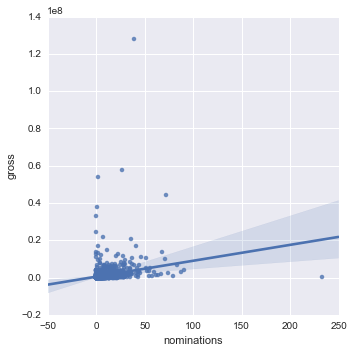

In [51]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x="nominations", y="gross", data=df_reg_1)

In [53]:
import statsmodels.api as sm
from patsy import dmatrices
from patsy import dmatrix

y, X = dmatrices('gross ~ nominations', data=df_reg_1, return_type='dataframe')

In [54]:
model = sm.OLS(y, X)
results = model.fit()

In [55]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     80.06
Date:                Wed, 07 Oct 2015   Prob (F-statistic):           9.82e-19
Time:                        15:16:03   Log-Likelihood:                -26756.
No. Observations:                1600   AIC:                         5.352e+04
Df Residuals:                    1598   BIC:                         5.353e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept    4.733e+05   1.31e+05      3.609      0.000      2.16e+05  7.31e+05
nominations  8.528e+04   9531.136      8.948      0.000      6.66e+04  1.04e+05
==============================================================================
Omnibus:                     3369.138   Durbin-Watson:                   0.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11968615.054
Skew:                          17.410   Prob(JB):                         0.00
Kurtosis:                     425.276   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""